In [1]:
# Import Dependendies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import csvs
defensive = pd.read_csv("../Resources/clean_defensive.csv")
kickers = pd.read_csv("../Resources/clean_field_goal_kickers.csv")
fumbles = pd.read_csv("../Resources/clean_fumbles.csv")
passing = pd.read_csv("../Resources/clean_passing.csv")
receiving = pd.read_csv("../Resources/clean_receiving.csv")
rushing = pd.read_csv("../Resources/clean_rushing.csv")

In [3]:
# Files to be merged
files = [kickers, fumbles, passing, receiving, rushing]

In [4]:
# Merge dataframes
df = defensive
for i in range(5):
    df = pd.merge(df, files[i],on='team_year',how='left').fillna(0)

In [5]:
# Visualize df
df

,team_year,total_tackles_def,solo_tackles_def,assisted_tackles_def,sacks_def,safties_def,passes_defended_def,ints_def,ints_for_tds_def,int_yards_def,...,receptions_rec,receiving_yards_rec,receiving_tds_rec,first_down_receptions_rec,fumbles_rec,rushing_attempts_rush,rushing_yards_rush,rushing_tds_rush,rushing_first_downs_rush,fumbles_rush
0,arizona_cardinals_1994,0,0,0,9,0,0,1,1,59,...,133,1212,4,65,2,140,413,6,26,7
1,arizona_cardinals_1995,0,0,0,3,0,0,3,0,42,...,225,2647,11,121,2,83,264,2,11,2
2,arizona_cardinals_1996,0,0,0,2,0,0,3,0,23,...,243,2459,14,140,3,276,1099,6,48,7
3,arizona_cardinals_1997,0,0,0,12,0,0,3,0,15,...,182,1938,10,95,4,133,385,2,24,2
4,arizona_cardinals_1998,0,0,0,10,0,0,10,0,80,...,182,1997,6,92,4,124,366,6,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1264,washington_redskins_2012,652,418,234,22,0,54,15,2,187,...,139,1856,11,85,1,484,2569,20,134,13
1265,washington_redskins_2013,684,456,228,21,0,42,9,4,127,...,231,2762,15,127,3,384,1852,10,92,10
1266,washington_redskins_2014,684,489,195,13,0,35,5,0,16,...,304,3761,16,159,4,345,1400,13,72,8
1267,washington_redskins_2015,927,596,331,33,1,59,10,1,173,...,386,4294,30,208,7,429,1566,9,80,11


In [6]:
df.to_csv("../Resources/merged_df.csv", header = True, index = True)

In [7]:
# Descriptive statistics: Great percentage of variables are 0's
for col in df.loc[:, df.columns != "team_year"]:
    print(col)
    print(df[col].describe())
    print(" ")

total_tackles_def
count    1269.000000
mean      267.446809
std       346.473429
min         0.000000
25%         0.000000
50%         0.000000
75%       587.000000
max      1083.000000
Name: total_tackles_def, dtype: float64
 
solo_tackles_def
count    1269.000000
mean      201.382191
std       258.371776
min         0.000000
25%         0.000000
50%         0.000000
75%       457.000000
max       803.000000
Name: solo_tackles_def, dtype: float64
 
assisted_tackles_def
count    1269.000000
mean       66.064618
std        93.049242
min         0.000000
25%         0.000000
50%         0.000000
75%       129.000000
max       438.000000
Name: assisted_tackles_def, dtype: float64
 
sacks_def
count    1269.000000
mean       13.952719
std         9.433612
min         0.000000
25%         7.000000
50%        14.000000
75%        20.000000
max        45.000000
Name: sacks_def, dtype: float64
 
safties_def
count    1269.000000
mean        0.189913
std         0.450404
min         0.000000
25% 

In [8]:
# Since 0's are probably related to year of measurement, we'll need a dataset by year to evaluate
# Create "year" column
df_var_check = df
df_var_check["year"] = [int(row[-4:]) for row in df_var_check["team_year"]]

# Drop "team_year"
df_var_check = df_var_check.drop("team_year", axis = 1)

In [9]:
# Group by year
df_var_check_year = df_var_check.groupby("year").sum()

In [10]:
# We can see many variables with 0's
df_var_check_year.head(10)

,total_tackles_def,solo_tackles_def,assisted_tackles_def,sacks_def,safties_def,passes_defended_def,ints_def,ints_for_tds_def,int_yards_def,kicks_blocked_kick,...,receptions_rec,receiving_yards_rec,receiving_tds_rec,first_down_receptions_rec,fumbles_rec,rushing_attempts_rush,rushing_yards_rush,rushing_tds_rush,rushing_first_downs_rush,fumbles_rush
year,,,,,,,,,,,,,,,,,,,,,
1970,0,0,0,0,0,0,0,0,0,0.0,...,25,242,3,0,0,166,619,6,0,0
1971,0,0,0,0,0,0,3,0,7,0.0,...,523,6815,48,0,0,1338,5595,25,0,0
1972,0,0,0,0,0,0,7,1,83,0.0,...,778,10199,60,0,0,2216,9350,71,0,0
1973,0,0,0,0,2,0,9,0,106,0.0,...,975,12376,85,0,0,3041,11607,79,0,0
1974,0,0,0,0,0,0,13,1,179,0.0,...,1463,18543,109,0,0,3223,12470,97,0,0
1975,0,0,0,0,2,0,31,2,388,0.0,...,1855,22655,142,0,0,4639,17968,149,0,0
1976,0,0,0,0,1,0,28,3,418,0.0,...,2213,28327,175,0,0,6244,25064,173,0,0
1977,0,0,0,0,2,0,39,3,450,0.0,...,2287,28433,151,0,0,6940,26594,181,0,0
1978,0,0,0,0,2,0,85,4,974,0.0,...,3159,40397,241,0,0,7557,29934,207,0,0


total_tackles_def


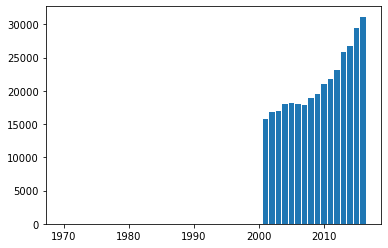

 
solo_tackles_def


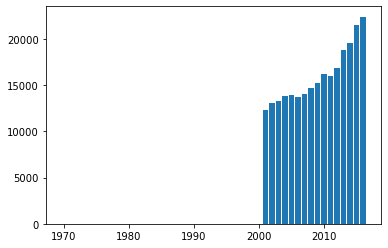

 
assisted_tackles_def


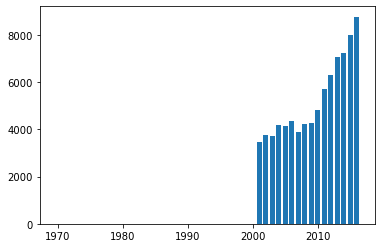

 
sacks_def


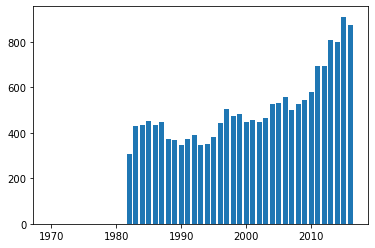

 
safties_def


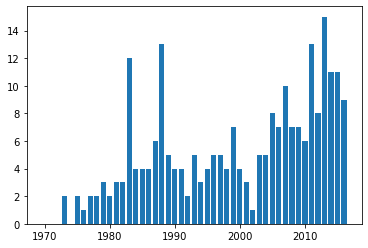

 
passes_defended_def


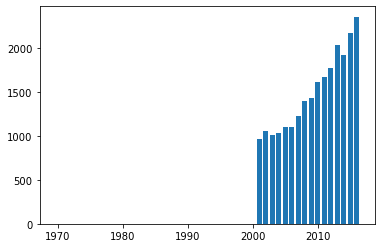

 
ints_def


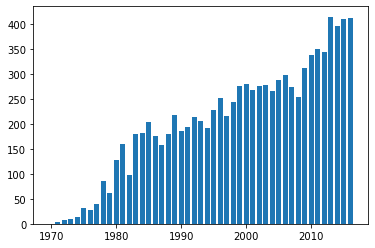

 
ints_for_tds_def


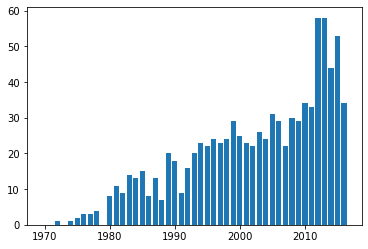

 
int_yards_def


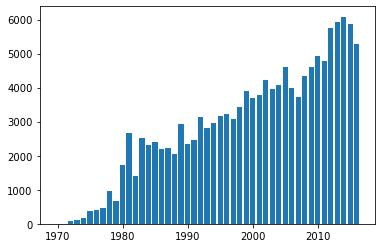

 
kicks_blocked_kick


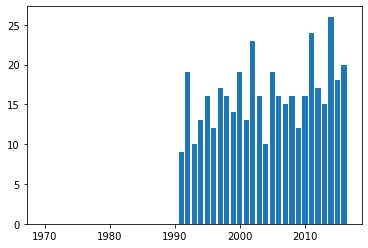

 
fgs_made_kick


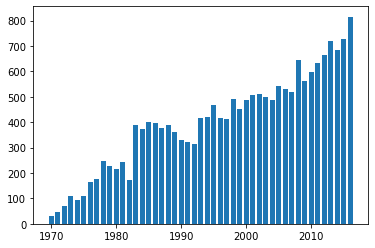

 
fgs_attempted_kick


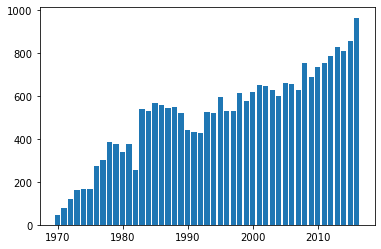

 
extra_points_attempted_kick


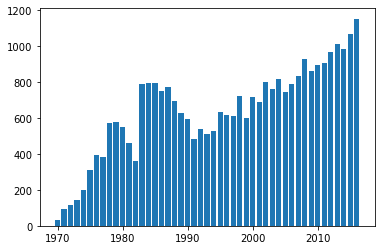

 
extra_points_made_kick


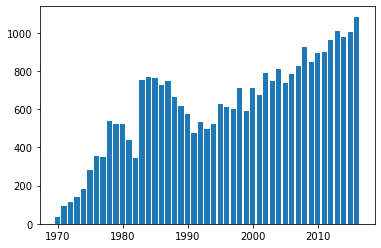

 
extra_points_blocked_kick


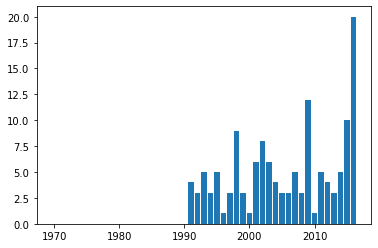

 
fumbles_lost_fum


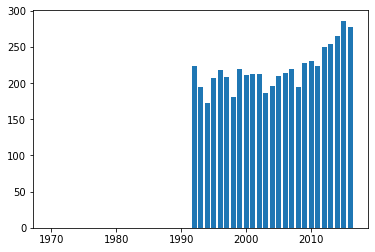

 
forced_fumbles_fum


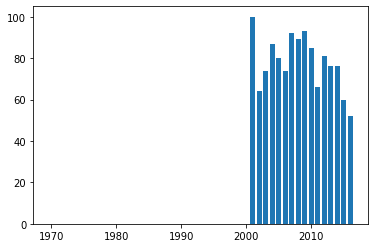

 
own_fumble_return_yards_fum


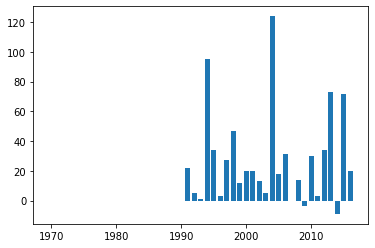

 
opponent_fumble_return_yards_fum


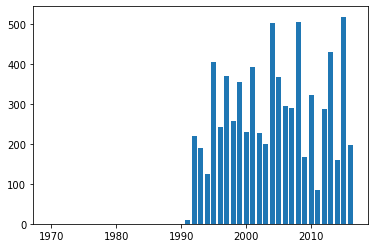

 
fumble_return_tds


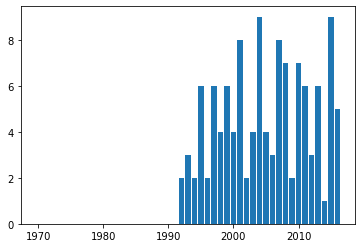

 
passes_attempted_pass


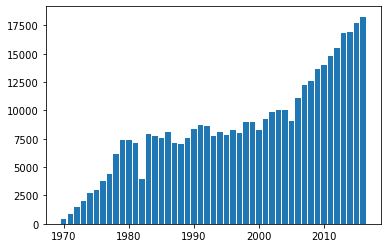

 
passes_completed_pass


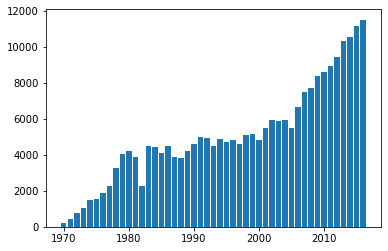

 
passing_yards_pass


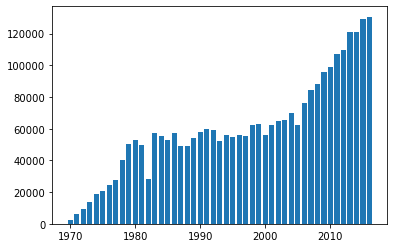

 
td_passes_pass


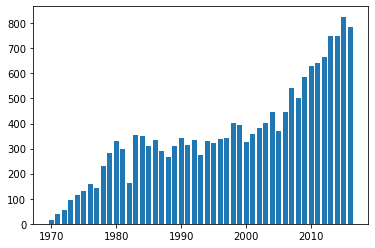

 
ints_pass


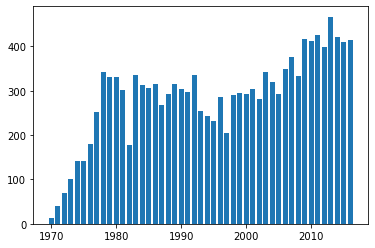

 
sacks_pass


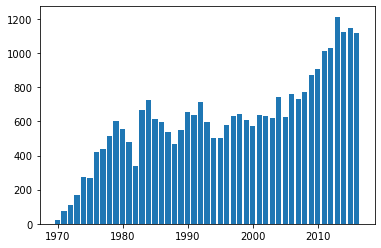

 
sacked_yards_lost_pass


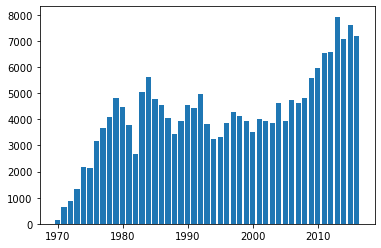

 
receptions_rec


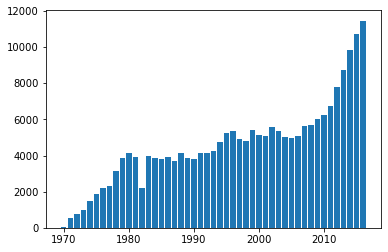

 
receiving_yards_rec


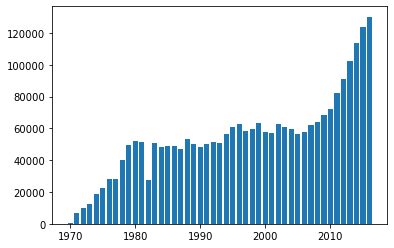

 
receiving_tds_rec


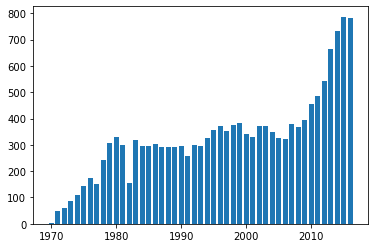

 
first_down_receptions_rec


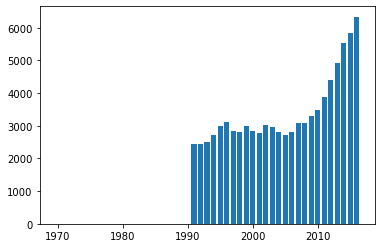

 
fumbles_rec


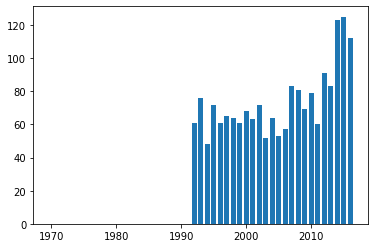

 
rushing_attempts_rush


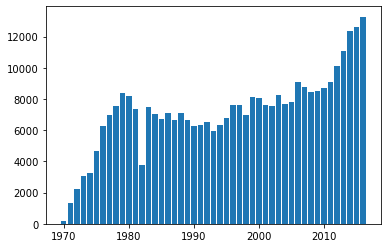

 
rushing_yards_rush


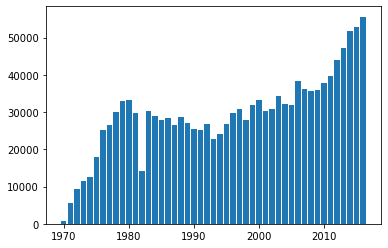

 
rushing_tds_rush


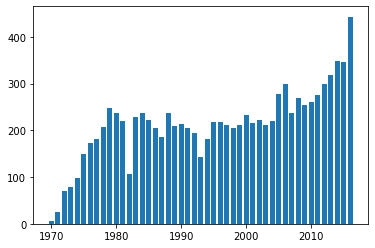

 
rushing_first_downs_rush


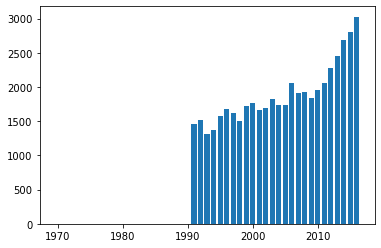

 
fumbles_rush


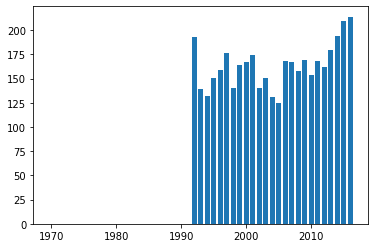

In [11]:
# Plot variables to check for empty years
for var in df_var_check_year.columns:
    plt.figure()
    print(var)
    plt.bar(df_var_check_year.index, height = df_var_check_year[var])
    plt.show()
    plt.close()
    print(" ")

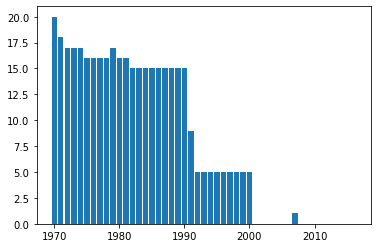

In [12]:
# Plot the number of empty (has 0) variables across the years.
plt.figure()
plt.bar(df_var_check_year.index, height = (df_var_check_year==0).sum(axis=1))
plt.show()
plt.close()

# Descriptive Statistics for Reduced Dataset

## Reduce complete dataset to account for empty years in many variables


In [13]:
# From our original dataframe we create a new one by filtering only the years we will use for our analysis
df_reduced = df
# Creating "year" column 
df_reduced["year"] = [int(row[-4:]) for row in df_reduced["team_year"]]
df_reduced["team"] = [str(row[:-5]) for row in df_reduced["team_year"]]

# Filtering rows from 2001 to 2016
df_reduced = df_reduced[df_reduced['year'] >= 2001]

# Viz dataframe
df_reduced.head()

,team_year,total_tackles_def,solo_tackles_def,assisted_tackles_def,sacks_def,safties_def,passes_defended_def,ints_def,ints_for_tds_def,int_yards_def,...,receiving_tds_rec,first_down_receptions_rec,fumbles_rec,rushing_attempts_rush,rushing_yards_rush,rushing_tds_rush,rushing_first_downs_rush,fumbles_rush,year,team
7,arizona_cardinals_2001,670,516,154,5,0,29,13,0,153,...,8,80,3,245,869,5,44,5,2001,arizona_cardinals
8,arizona_cardinals_2002,547,408,139,12,0,24,7,0,64,...,11,75,0,39,166,0,8,0,2002,arizona_cardinals
9,arizona_cardinals_2003,548,461,87,15,0,35,8,0,152,...,11,101,3,53,262,1,15,3,2003,arizona_cardinals
10,arizona_cardinals_2004,511,407,104,16,0,43,7,0,84,...,11,111,3,147,527,3,32,3,2004,arizona_cardinals
11,arizona_cardinals_2005,483,397,86,19,0,27,9,3,179,...,19,180,2,181,641,2,31,6,2005,arizona_cardinals


In [14]:
# Descriptive statistics
for col in df_reduced.loc[:, df_reduced.columns != "team_year"]:
    print(col)
    print(df_reduced[col].describe())
    print(" ")

total_tackles_def
count     511.000000
mean      664.168297
std       185.621793
min       235.000000
25%       525.500000
50%       649.000000
75%       793.500000
max      1083.000000
Name: total_tackles_def, dtype: float64
 
solo_tackles_def
count    511.000000
mean     500.105675
std      127.622254
min      180.000000
25%      405.000000
50%      488.000000
75%      595.500000
max      803.000000
Name: solo_tackles_def, dtype: float64
 
assisted_tackles_def
count    511.000000
mean     164.062622
std       73.601843
min       37.000000
25%      111.000000
50%      146.000000
75%      206.000000
max      438.000000
Name: assisted_tackles_def, dtype: float64
 
sacks_def
count    511.000000
mean      19.409002
std        8.101261
min        0.000000
25%       14.000000
50%       19.000000
75%       25.000000
max       45.000000
Name: sacks_def, dtype: float64
 
safties_def
count    511.000000
mean       0.246575
std        0.510539
min        0.000000
25%        0.000000
50%        0

## Redundant Pairs with Correlations

In [15]:
# Looping through correlation matrix to print redundant pairs
corrM = df_reduced.corr().abs()
corrs = []
for col in corrM.columns:
    for row in corrM.index:
        if (corrM.loc[row, col] >= .80 and corrM.loc[row, col] != 1 and col != row and corrM.loc[row, col] not in corrs):
            corrs.append(corrM.loc[row, col])
            print(f"{col} and {row}: {corrM.loc[row, col]}")
            print(" ")

total_tackles_def and solo_tackles_def: 0.956662501842155
 
total_tackles_def and assisted_tackles_def: 0.8631627272615162
 
fgs_made_kick and fgs_attempted_kick: 0.985718989563427
 
fgs_made_kick and extra_points_attempted_kick: 0.8216854978159222
 
fgs_made_kick and extra_points_made_kick: 0.8205236973298792
 
fgs_attempted_kick and extra_points_attempted_kick: 0.8236283927806448
 
fgs_attempted_kick and extra_points_made_kick: 0.8224741592036244
 
extra_points_attempted_kick and extra_points_made_kick: 0.998452170578115
 
passes_attempted_pass and passes_completed_pass: 0.9895368227289973
 
passes_attempted_pass and passing_yards_pass: 0.975914881623829
 
passes_attempted_pass and td_passes_pass: 0.8516776503681462
 
passes_completed_pass and passing_yards_pass: 0.9870547418745416
 
passes_completed_pass and td_passes_pass: 0.8848702823106389
 
passing_yards_pass and td_passes_pass: 0.9136291647969782
 
sacks_pass and sacked_yards_lost_pass: 0.972180513085952
 
receptions_rec and re

In [16]:
## Creating new columns from correlated columns

In [17]:
# Obtaining success rates by dividing successful attempts by the total number of attempts
df_reduced['fg_success_rate'] = df_reduced.fgs_made_kick / df_reduced.fgs_attempted_kick
df_reduced['extra_success_rate'] = df_reduced.extra_points_made_kick / df_reduced.extra_points_attempted_kick 
df_reduced['pass_success_rate'] = df_reduced.passes_completed_pass  / df_reduced.passes_attempted_pass  

C:\Users\Mario\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Mario\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Mario\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [18]:
# Obtaining average yards per play by dividing total yards by play over susccesfyl plays
df_reduced['avg_yards_pass'] = df_reduced.receiving_yards_rec / df_reduced.receptions_rec 
df_reduced['avg_yards_rush'] = df_reduced.rushing_yards_rush  / df_reduced.rushing_attempts_rush   

# Obtaining total number of kicks blocked by the special teams
df_reduced['kicks_blocked'] = df_reduced.kicks_blocked_kick  + df_reduced.extra_points_blocked_kick   

C:\Users\Mario\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Mario\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Mario\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [19]:
# Defining preference between passing and rushing plays
df_reduced['passes_per_rushing_plays'] = df_reduced.passes_attempted_pass  / df_reduced.rushing_attempts_rush  

C:\Users\Mario\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Dropping redundant columns

In [20]:
# "total_tackles# is the sum of solo and assisted tackles, tehrefeore it's the only column of these three that we will keep
df_reduced = df_reduced.drop(["solo_tackles_def","assisted_tackles_def"],axis=1)
# It's not relevant for our study to know what down a play was made in, therefore we drop "first_down's"
df_reduced = df_reduced.drop(["first_down_receptions_rec","rushing_first_downs_rush"],axis=1)
# Knowing how many sacks a team recieved is more important than the yards lost in sacks, so we keep only the firs measure
df_reduced = df_reduced.drop(["sacked_yards_lost_pass"],axis=1)
# It's not relevant for our study to know how many yards a team won by interception or igf the play was an attempt of touwchdown, we keep only the number of interceptions
df_reduced = df_reduced.drop(["int_yards_def","ints_for_tds_def"],axis=1)
# We will keep only the number of fumbles lost, since other fumble related stats are not relevant for our study
df_reduced = df_reduced.drop(["forced_fumbles_fum","own_fumble_return_yards_fum","opponent_fumble_return_yards_fum",
                              "fumble_return_tds","fumbles_rec", "fumbles_rush"],axis=1)

#Droping unnecesary columns after creating rate columns
df_reduced = df_reduced.drop(["receiving_yards_rec","passes_completed_pass","extra_points_made_kick","extra_points_attempted_kick",
                             "passes_attempted_pass","fgs_made_kick","fgs_attempted_kick","receptions_rec","rushing_yards_rush",
                             "rushing_attempts_rush","kicks_blocked_kick","extra_points_blocked_kick","passing_yards_pass"],axis=1)


df_reduced.head()

,team_year,total_tackles_def,sacks_def,safties_def,passes_defended_def,ints_def,fumbles_lost_fum,td_passes_pass,ints_pass,sacks_pass,...,rushing_tds_rush,year,team,fg_success_rate,extra_success_rate,pass_success_rate,avg_yards_pass,avg_yards_rush,kicks_blocked,passes_per_rushing_plays
7,arizona_cardinals_2001,670,5,0,29,13,7.0,0.0,0.0,0.0,...,5,2001,arizona_cardinals,0.833333,1.0,0.000000,10.715232,3.546939,0.0,0.004082
8,arizona_cardinals_2002,547,12,0,24,7,1.0,0.0,2.0,5.0,...,0,2002,arizona_cardinals,NaN,NaN,0.388889,11.470588,4.256410,0.0,0.461538
9,arizona_cardinals_2003,548,15,0,35,8,7.0,5.0,7.0,25.0,...,1,2003,arizona_cardinals,0.750000,1.0,0.568862,12.957831,4.943396,0.0,3.150943
10,arizona_cardinals_2004,511,16,0,43,7,7.0,13.0,18.0,39.0,...,3,2004,arizona_cardinals,0.758621,1.0,0.560150,11.369231,3.585034,0.0,3.619048
11,arizona_cardinals_2005,483,19,0,27,9,11.0,21.0,21.0,45.0,...,2,2005,arizona_cardinals,0.955556,1.0,0.625373,12.421053,3.541436,0.0,3.701657


In [21]:
# Looping through correlation matrix to print redundant pairs
corrM = df_reduced.corr().abs()
corrs = []
for col in corrM.columns:
    for row in corrM.index:
        if (corrM.loc[row, col] >= .80 and corrM.loc[row, col] != 1 and col != row and corrM.loc[row, col] not in corrs):
            corrs.append(corrM.loc[row, col])
            print(f"{col} and {row}: {corrM.loc[row, col]}")
            print(" ")

## Creating new CSV based on EDA

In [22]:
# Import superbowl csv
sb_champion = pd.read_csv("../Resources/clean_superbowl.csv")

In [23]:
#Creating column with value 1 to indicate that team was champion in this year
sb_champion['Champion']=1

In [25]:
# Merging sb-champion DF to indicate which teams were Super Bowl champions 
sb_stats_df= pd.merge(df_reduced, sb_champion,on='team_year',how='left').fillna(0)
# Dropping year column from new DF
sb_stats_df = sb_stats_df.drop(["year_y"],axis=1)
# Renaming year column
sb_stats_df = sb_stats_df.rename(columns = {'year_x': 'year'}, inplace = False)

# Creating CSV file with relevant stats and champion column
sb_stats_df.to_csv("../Resources/sb_champion_stats.csv", header = True, index = True)